In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math

UsageError: Line magic function `%` not found.


In [96]:
df = pd.read_csv("D:/Machine Learning/IMARTICUS MLP/Data Files/Titanic DS/train.csv")
df.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [97]:
print("Number of passengers in original data :  " + str(len(df.index)))

Number of passengers in original data :  891


In [98]:
df.shape

(891, 12)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Analyzing the data

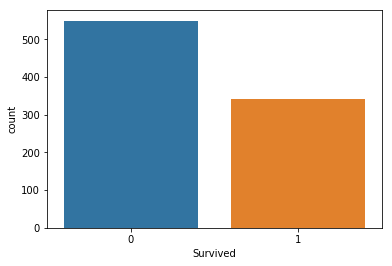

In [100]:
#Count plot
sns.countplot(x = "Survived", data = df)

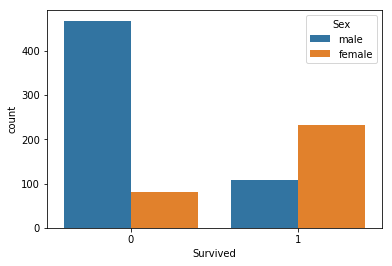

In [101]:
sns.countplot(x = "Survived", hue = "Sex", data = df)

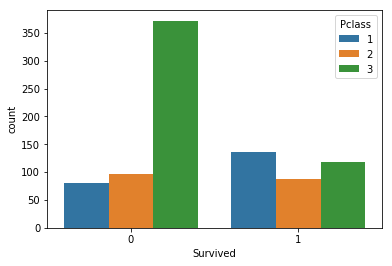

In [102]:
sns.countplot(x = "Survived", hue = "Pclass", data = df)

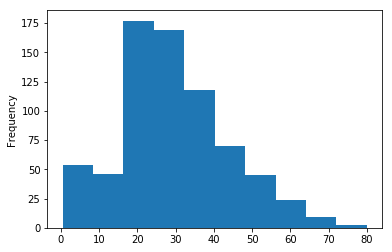

In [103]:
df["Age"].plot.hist()

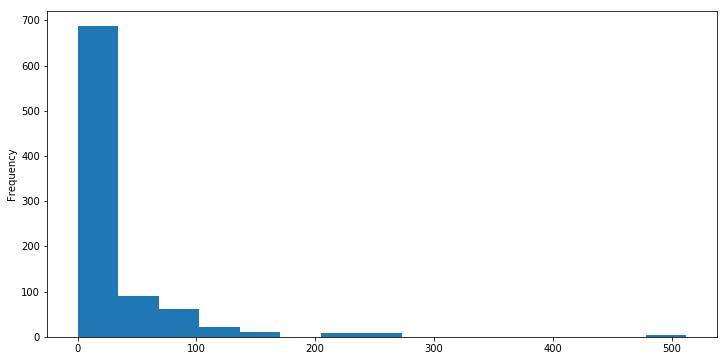

In [104]:
df["Fare"].plot.hist(bins = 15, figsize = (12,6))

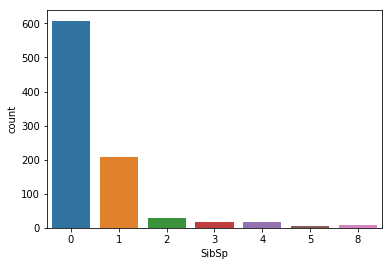

In [105]:
sns.countplot(x = "SibSp", data = df)

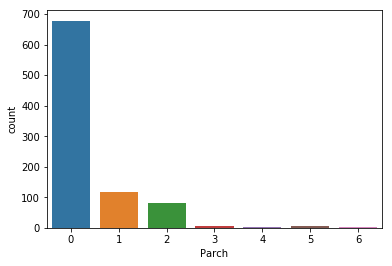

In [106]:
sns.countplot(x = "Parch", data = df)

# Data Wrangling

In [107]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [108]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

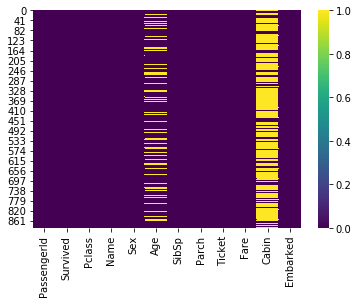

In [109]:
sns.heatmap(df.isnull(), cmap = "viridis")

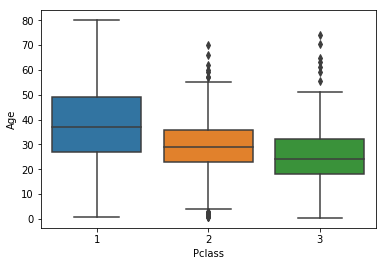

In [110]:
sns.boxplot(x = "Pclass", y = "Age", data = df)

In [111]:
df.drop("Cabin", axis = 1, inplace = True)

In [112]:
df.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [113]:
## Fill missing values in Age feature with each sex’s mean value of Age 
df['Age'].fillna(df.groupby('Sex')['Age'].transform("mean"), inplace=True)

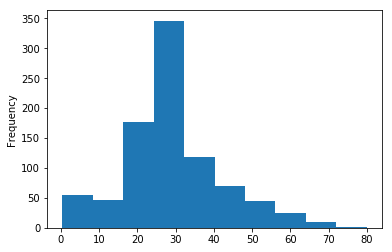

In [114]:
df["Age"].plot.hist()

In [115]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [116]:
#Embarked column contains 2 Null values
df.dropna(inplace = True) #Removes entire row having atleast 1 Null value.
df.shape

(889, 11)

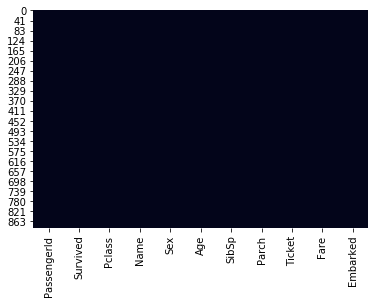

In [117]:
sns.heatmap(df.isnull(), cbar = 0)

In [118]:
sex = pd.get_dummies(df['Sex'], drop_first = 1)
sex.head(7)

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1


In [119]:
embark = pd.get_dummies(df['Embarked'], drop_first = 1)
embark.head(7)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1


In [120]:
pclass = pd.get_dummies(df['Pclass'], drop_first = 1)
pclass.head(7)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
5,0,1
6,0,0


In [121]:
df=pd.concat([df,sex,embark,pclass],axis = 1)
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0,1,0,1
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,Q,1,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,0,1,0,0


In [122]:
df.drop(['Name','Sex','Ticket','Embarked','PassengerId','Pclass'], axis = 1, inplace = True)

In [123]:
df.head(7)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.000000,1,0,7.2500,1,0,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0,1
3,1,35.000000,1,0,53.1000,0,0,1,0,0
4,0,35.000000,0,0,8.0500,1,0,1,0,1
5,0,30.726645,0,0,8.4583,1,1,0,0,1
6,0,54.000000,0,0,51.8625,1,0,1,0,0


# Splitting the dataset

In [124]:
X = df.drop("Survived",axis = 1)
y = df["Survived"]
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (889, 9)
y shape: (889,)


In [125]:
X.head(7)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.000000,1,0,7.2500,1,0,1,0,1
1,38.000000,1,0,71.2833,0,0,0,0,0
2,26.000000,0,0,7.9250,0,0,1,0,1
3,35.000000,1,0,53.1000,0,0,1,0,0
4,35.000000,0,0,8.0500,1,0,1,0,1
5,30.726645,0,0,8.4583,1,1,0,0,1
6,54.000000,0,0,51.8625,1,0,1,0,0


In [126]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (666, 9)
X_test shape: (223, 9)
y_train shape: (666,)
y_test shape: (223,)


In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
lgr = LogisticRegression()

In [131]:
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
y_pred = lgr.predict(X_test)

In [133]:
from sklearn.metrics import classification_report

In [134]:
classification_report(y_test, y_pred)

'             precision    recall  f1-score   support\n\n          0       0.77      0.84      0.80       132\n          1       0.73      0.64      0.68        91\n\navg / total       0.76      0.76      0.75       223\n'

In [135]:
from sklearn.metrics import confusion_matrix

In [136]:
confusion_matrix(y_test,y_pred)

array([[111,  21],
       [ 33,  58]], dtype=int64)

In [137]:
from sklearn.metrics import accuracy_score

In [138]:
accuracy_score(y_test,y_pred)*100

75.7847533632287

## Building a Logistic Regression with Cost Function and Gradient Descent

In [139]:
theta = np.zeros((X.shape[1], 1))

In [140]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [141]:
def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,x)) - y)

In [142]:
from scipy.optimize import fmin_tnc
def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(x, y))
    return opt_weights[0]
parameters = fit(X, y, theta)

In [143]:
theta.shape

(9, 1)

In [144]:
X.shape

(889, 9)

In [145]:
y.shape

(889,)

In [146]:
parameters

array([ 0.00341734, -0.25184777, -0.07740985,  0.01734696, -2.17716863,
        0.54833306,  0.24141205,  0.61614454, -0.22973943])

In [147]:
def predict(x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)
def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100
accuracy(X, y)

78.51518560179977

## Assignment 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math

UsageError: Line magic function `%` not found.


In [87]:
samp_df = pd.read_csv("D:/Machine Learning/Data Sets/Output_11.csv")
samp_df.head(7)

,Variable X,Target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0


In [88]:
X1 = samp_df.drop("Target",axis = 1)
y1 = samp_df["Target"]
print("X shape:",X1.shape)
print("y shape:",y1.shape)

X shape: (30, 1)
y shape: (30,)


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state = 0, shuffle = True)

In [90]:
X_train

,Variable X
17,47
22,142
5,5
16,46
8,8
14,44
23,143
20,140
1,1
29,149


In [91]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
pred = lr.predict(X_test)

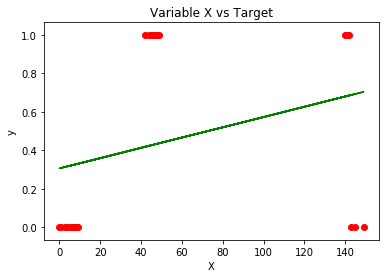

In [93]:
#Visualizing the Test set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'green')
plt.title('Variable X vs Target')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

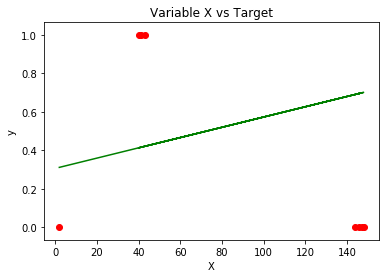

In [94]:
#Visualizing the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, lr.predict(X_test), color = 'green')
plt.title('Variable X vs Target')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## PCA

In [172]:
X.head(7)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.000000,1,0,7.2500,1,0,1,0,1
1,38.000000,1,0,71.2833,0,0,0,0,0
2,26.000000,0,0,7.9250,0,0,1,0,1
3,35.000000,1,0,53.1000,0,0,1,0,0
4,35.000000,0,0,8.0500,1,0,1,0,1
5,30.726645,0,0,8.4583,1,1,0,0,1
6,54.000000,0,0,51.8625,1,0,1,0,0


In [173]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalComponents

array([[-25.02655705,  -7.09684223],
       [ 39.37970699,   7.35970265],
       [-24.25713681,  -3.09866709],
       ...,
       [ -8.68027323,  -1.60411849],
       [ -2.18520083,  -3.61473918],
       [-24.28831571,   2.90615168]])

In [174]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [175]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [176]:
finalDf.shape

(891, 3)

In [177]:
finalDf.head(7)

,principal component 1,principal component 2,Survived
0,-25.026557,-7.096842,0.0
1,39.379707,7.359703,1.0
2,-24.257137,-3.098667,1.0
3,21.128324,4.798222,1.0
4,-23.916884,5.897062,0.0
5,-23.610943,1.616626,0.0
6,20.344092,23.841759,0.0


In [178]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.93569247 0.06334377]


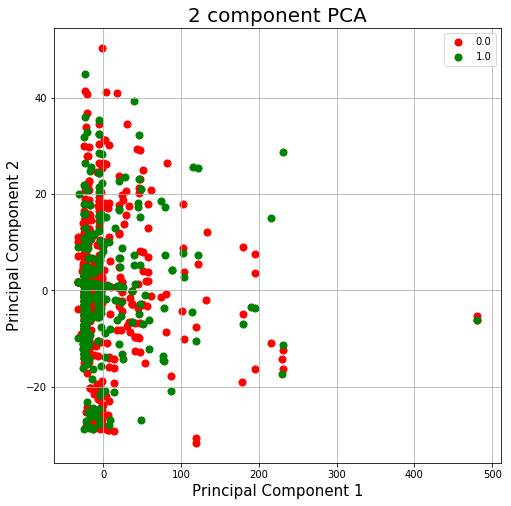

In [183]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0, 1.0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Survived'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

## t-SNE

In [208]:
import swat
from time import time
%matplotlib inline

In [209]:
from sklearn.manifold import TSNE

In [210]:
X3 = TSNE(n_components = 2).fit_transform(X)

In [211]:
X3

array([[  8.095176 ,  27.512163 ],
       [-36.265385 , -15.553905 ],
       [ 17.19474  ,  23.484076 ],
       ...,
       [ -5.743888 ,  -0.8933341],
       [-12.055121 ,  -2.2471118],
       [ 40.1046   ,  -2.0302675]], dtype=float32)

In [212]:
tsneDf = pd.DataFrame(data = X3, columns = ['tsne component 1', 'tsne component 2'])

In [213]:
tsneDf.head()

,tsne component 1,tsne component 2
0,8.095176,27.512163
1,-36.265385,-15.553905
2,17.194740,23.484076
3,-28.539913,-11.582201
4,25.305801,-6.579014


In [214]:
tsnefinal = pd.concat([tsneDf, y], axis = 1)
tsnefinal.head()

,tsne component 1,tsne component 2,Survived
0,8.095176,27.512163,0.0
1,-36.265385,-15.553905,1.0
2,17.194740,23.484076,1.0
3,-28.539913,-11.582201,1.0
4,25.305801,-6.579014,0.0


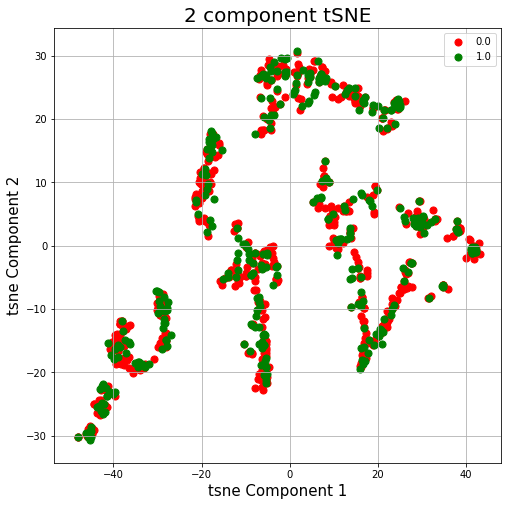

In [215]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15)
ax.set_ylabel('tsne Component 2', fontsize = 15)
ax.set_title('2 component tSNE', fontsize = 20)
targets = [0.0, 1.0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = tsnefinal['Survived'] == target
    ax.scatter(tsnefinal.loc[indicesToKeep, 'tsne component 1'],
               tsnefinal.loc[indicesToKeep, 'tsne component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()